In [ ]:
#2021년 코로나 Data 분석하기 (2021년 1월 ~ 2021년 9월 6일 까지의 data 분석)

## 프로젝트 목표
- 2021년 서울시 코로나19 확진자 현황 데이터를 분석하여 유의미한 정보 도출
- matplotlib을 다루는 법 학습

## 데이터 출처
-  https://www.data.go.kr/tcs/dss/selectFileDataDetailView.do?publicDataPk=15063273
-  http://data.seoul.go.kr/dataList/OA-20279/S/1/datasetView.do

## 1. 데이터 읽기
필요한 패키지 설치 및 `import`한 후 `pandas`를 사용하여 데이터를 읽고 어떠한 데이터가 저장되어 있는지 확인.

### 1.1. 데이터 불러오기

In [3]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# pd.read_csv를 통하여 dataframe 형태로 csv 파일 읽기.
corona_all=pd.read_csv("./data/서울시 코로나19 확진자 현황.csv")

In [5]:
# head() 함수를 이용해 상위 5개 데이터를 출력.
corona_all.head()

,연번,확진일,환자번호,국적,환자정보,지역,여행력,접촉력,조치사항,상태,이동경로,등록일,수정일,노출여부
0,82657,2021-09-05,NaN,NaN,NaN,영등포구,NaN,감염경로 조사중,NaN,-,NaN,2021-09-06 10:36,2021-09-06 10:36,Y
1,82656,2021-09-05,NaN,NaN,NaN,서대문구,NaN,타시도 확진자 접촉,NaN,-,NaN,2021-09-06 10:36,2021-09-06 10:36,Y
2,82655,2021-09-05,NaN,NaN,NaN,타시도,NaN,기타 확진자 접촉,NaN,-,NaN,2021-09-06 10:36,2021-09-06 10:36,Y
3,82654,2021-09-05,NaN,NaN,NaN,타시도,NaN,기타 확진자 접촉,NaN,-,NaN,2021-09-06 10:36,2021-09-06 10:36,Y
4,82653,2021-09-05,NaN,NaN,NaN,타시도,NaN,기타 확진자 접촉,NaN,-,NaN,2021-09-06 10:36,2021-09-06 10:36,Y


In [6]:
# dataframe 정보를 요약하여 출력. 
corona_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63016 entries, 0 to 63015
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   연번      63016 non-null  int64  
 1   확진일     63016 non-null  object 
 2   환자번호    0 non-null      float64
 3   국적      0 non-null      float64
 4   환자정보    0 non-null      float64
 5   지역      63016 non-null  object 
 6   여행력     970 non-null    object 
 7   접촉력     63016 non-null  object 
 8   조치사항    0 non-null      float64
 9   상태      63016 non-null  object 
 10  이동경로    0 non-null      float64
 11  등록일     63016 non-null  object 
 12  수정일     63016 non-null  object 
 13  노출여부    63016 non-null  object 
dtypes: float64(5), int64(1), object(8)
memory usage: 6.7+ MB


---

## 2. 데이터 정제

결측값(missing data), 이상치(outlier)를 처리하는 데이터 정제 과정을 수행하기.

### 2.1. 비어있는 column 지우기

corona_all.info() 코드를 통하여 `환자번호`, `국적`, `환자정보`, `조치사항`, `이동경로` 에 해당하는 데이터가 존재하지 않는 것을 확인.

dataframe.drop()를 사용하여 불필요한 column 데이터를 삭제하고 이 dataframe을 covid_delete_col에 저장.

In [7]:
# drop 함수를 사용하여 불필요한 coulmn 데이터를 삭제.
covid_delete_col = corona_all.drop(columns = ['환자번호','국적','환자정보','조치사항','이동경로'])

In [8]:
covid_delete_col.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63016 entries, 0 to 63015
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   연번      63016 non-null  int64 
 1   확진일     63016 non-null  object
 2   지역      63016 non-null  object
 3   여행력     970 non-null    object
 4   접촉력     63016 non-null  object
 5   상태      63016 non-null  object
 6   등록일     63016 non-null  object
 7   수정일     63016 non-null  object
 8   노출여부    63016 non-null  object
dtypes: int64(1), object(8)
memory usage: 4.3+ MB


---

## 3. 데이터 시각화

데이터 정제를 완료한 covid_delete_col 데이터를 통하여, 각 column의 변수별로 어떠한 데이터 분포를 하고 있는지 시각화.

### 3.1. 확진일 데이터 전처리하기

`확진일` 데이터를 간단히 출력해보면 `년-월-일` 형태의 날짜 형식임을 알 수 있다.

문자열 형식의 데이터를 나누어 숫자 형 데이터로 변환해야 한다.

In [9]:
covid_delete_col['확진일']

0        2021-09-05
1        2021-09-05
2        2021-09-05
3        2021-09-05
4        2021-09-05
            ...    
63011    2021-01-02
63012    2021-01-02
63013    2021-01-02
63014    2021-01-02
63015    2021-01-02
Name: 확진일, Length: 63016, dtype: object

#### `확진일` 데이터를 `year`,`month`, `day` 데이터로 나누기

`확진일`에 저장된 문자열 데이터를 나누어 `year`,`month`, `day` column에 int64 형태로 저장.

In [10]:
# dataframe에 추가하기 전, 임시로 데이터를 저장해 둘 list를 선언.
year = []
month = []
day = []

for data in covid_delete_col['확진일']:
    
    # split 함수를 사용하여 년, 월, 일로 나누어 list에 저장.
    year.append(data.split('-')[0])
    month.append(data.split('-')[1])
    day.append(data.split('-')[2])

In [11]:
# covid_delete_col에 `year`,`month`, `day` column을 생성 + list에 임시 저장된 데이터를 입력.

covid_delete_col['year'] = year
covid_delete_col['month'] = month
covid_delete_col['day'] = day

covid_delete_col['year'].astype('int64')
covid_delete_col['day'].astype('int64')
covid_delete_col['month'].astype('int64')

0        9
1        9
2        9
3        9
4        9
        ..
63011    1
63012    1
63013    1
63014    1
63015    1
Name: month, Length: 63016, dtype: int64

### 3.2. 월별 확진자 수 출력

나누어진 `month`의 데이터를 바탕으로 달별 확진자 수를 막대그래프로 출력해 보겠습니다.

In [12]:
# 그래프의 x축의 순서를 정리하기 위하여 order list를 생성.

xorder = ['01', '02', '03', '04', '05', '06', '07', '08', '09']    
xorder

['01', '02', '03', '04', '05', '06', '07', '08', '09']

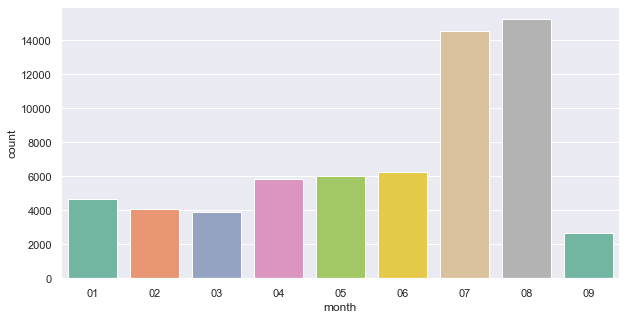

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

# 그래프의 사이즈를 조절.
plt.figure(figsize=(10,5))

# seaborn의 countplot 함수를 사용하여 출력.
sns.set(style="darkgrid")
ax = sns.countplot(x="month", data=covid_delete_col, palette="Set2", order = xorder)

<AxesSubplot:>

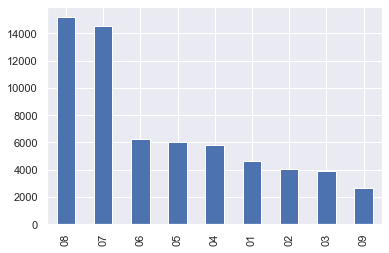

In [14]:
# series의 plot 함수를 사용한 출력 방법도 있다.
covid_delete_col['month'].value_counts().plot(kind='bar')

In [15]:
# value_counts()는 각 데이터를 세어서 내림차순으로 정리하는 함수입니다.
covid_delete_col['month'].value_counts()

08    15195
07    14504
06     6258
05     6030
04     5803
01     4634
02     4060
03     3897
09     2635
Name: month, dtype: int64

### 3.3. 8월달 일별 확진자 수 출력

월별 확진자 수를 출력해보면 알 수 있듯이 8월에 확진자 수가 가장 많았습니다.

이번엔 8월 동안 확진자 수가 어떻게 늘었는지 일별 확진자 수를 막대그래프로 출력해 봅시다

In [16]:
# 그래프에서 x축의 순서를 정리하기 위하여 order list를 생성합니다.
xorder2 = []
for i in range(1,32):
    
    xorder2.append(str(i))

xorder2

['1',
 '2',
 '3',
 '4',
 '5',
 '6',
 '7',
 '8',
 '9',
 '10',
 '11',
 '12',
 '13',
 '14',
 '15',
 '16',
 '17',
 '18',
 '19',
 '20',
 '21',
 '22',
 '23',
 '24',
 '25',
 '26',
 '27',
 '28',
 '29',
 '30',
 '31']

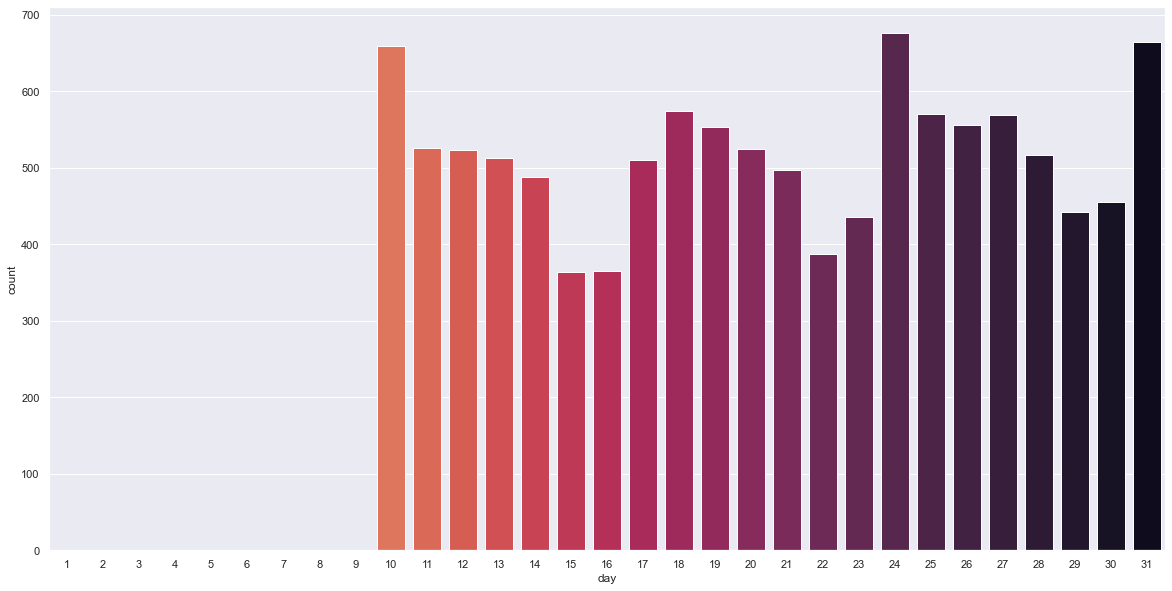

In [17]:
# seaborn의 countplot 함수를 사용하여 출력합니다.
plt.figure(figsize=(20,10))
sns.set(style="darkgrid")
ax = sns.countplot(x="day", data=covid_delete_col[covid_delete_col['month'] == '08'], palette="rocket_r", order = xorder2)

### 3.4. 지역별 확진자 수 출력

`지역` 데이터를 간단히 출력해보면 `oo구` 형태의 문자열 데이터임을 알 수 있다.

In [18]:
covid_delete_col['지역']

0        영등포구
1        서대문구
2         타시도
3         타시도
4         타시도
         ... 
63011     동작구
63012     타시도
63013     타시도
63014     광진구
63015     용산구
Name: 지역, Length: 63016, dtype: object

지역별로 확진자가 얼마나 있는지 막대그래프로 출력.

In [19]:
import matplotlib.font_manager as fm

font_dirs = ['/usr/share/fonts/truetype/nanum', ]
font_files = fm.findSystemFonts(fontpaths=font_dirs)

for font_file in font_files:
    fm.fontManager.addfont(font_file)

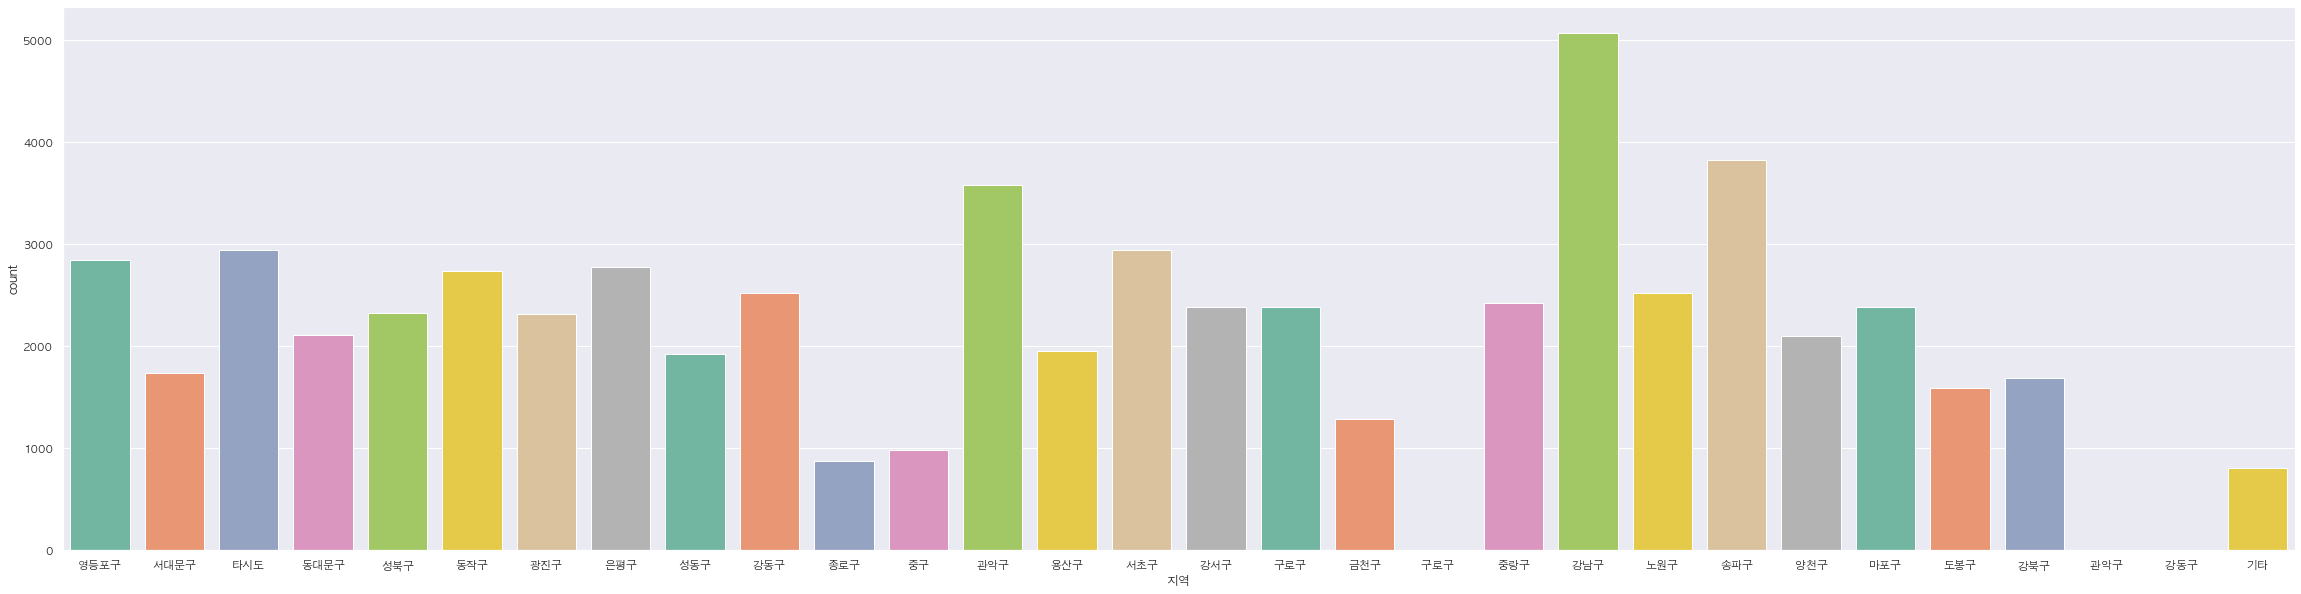

In [20]:
plt.figure(figsize=(40,10))
plt.rcParams['font.family'] = 'AppleGothic'

# 한글 출력을 위해서 폰트 옵션을 설정.
# 참고: https://teddylee777.github.io/visualization/matplotlib-%EC%8B%9C%EA%B0%81%ED%99%94-%ED%95%9C%EA%B8%80%ED%8F%B0%ED%8A%B8%EC%A0%81%EC%9A%A9)
sns.set(font="AppleGothic", 
        rc={"axes.unicode_minus":False},
        style='darkgrid')

ax = sns.countplot(x="지역", data=covid_delete_col, palette="Set2")

### 3.5. 8월달 지역별 확진자 수 출력

감염자가 많았던 8월에는 지역별로 확진자가 어떻게 분포되어 있는지 막대그래프로 출력해 봅시다.

In [21]:
# 논리연산을 이용한 조건을 다음과 같이 사용하면 해당 조건에 맞는 데이터를 출력할 수 있습니다.
covid_delete_col[covid_delete_col['month'] == '08']

,연번,확진일,지역,여행력,접촉력,상태,등록일,수정일,노출여부,year,month,day
2635,80018,2021-08-31,강동구,NaN,기타 확진자 접촉,-,2021-09-06 10:36,2021-09-06 10:36,Y,2021,08,31
2636,80017,2021-08-31,강동구,NaN,기타 확진자 접촉,-,2021-09-06 10:36,2021-09-06 10:36,Y,2021,08,31
2637,80016,2021-08-31,강동구,NaN,기타 확진자 접촉,-,2021-09-06 10:36,2021-09-06 10:36,Y,2021,08,31
2638,80015,2021-08-31,강남구,NaN,감염경로 조사중,-,2021-09-06 10:36,2021-09-06 10:36,Y,2021,08,31
2639,80014,2021-08-31,강남구,NaN,기타 확진자 접촉,-,2021-09-06 10:36,2021-09-06 10:36,Y,2021,08,31
...,...,...,...,...,...,...,...,...,...,...,...,...
17825,64828,2021-08-01,마포구,NaN,감염경로 조사중,퇴원,2021-09-06 10:36,2021-09-06 10:36,Y,2021,08,01
17826,64827,2021-08-01,마포구,NaN,감염경로 조사중,퇴원,2021-09-06 10:36,2021-09-06 10:36,Y,2021,08,01
17827,64826,2021-08-01,마포구,NaN,마포구 소재 음식점 관련(?21.7.(2)),퇴원,2021-09-06 10:36,2021-09-06 10:36,Y,2021,08,01
17828,64825,2021-08-01,용산구,NaN,기타 확진자 접촉,퇴원,2021-09-06 10:36,2021-09-06 10:36,Y,2021,08,01


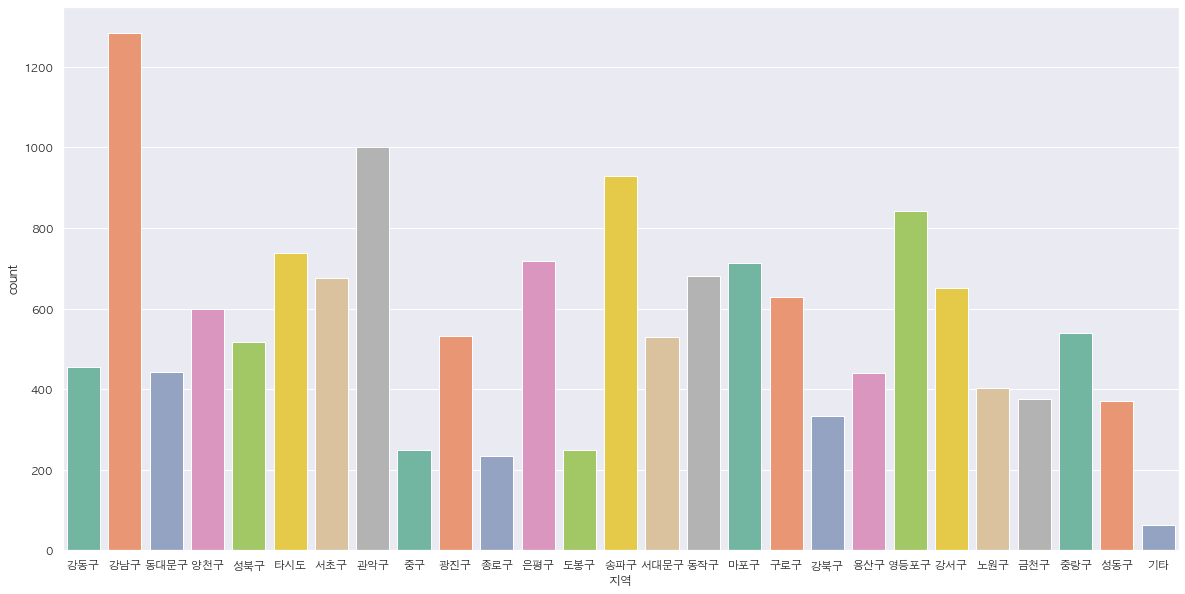

In [22]:
# 그래프로 출력합니다.
plt.figure(figsize=(20,10))
plt.rcParams['font.family'] = 'AppleGothic'
sns.set(font='AppleGothic', 
        rc={"axes.unicode_minus":False},
        style='darkgrid')
ax = sns.countplot(x="지역", data=covid_delete_col[covid_delete_col['month'] == '08'], palette="Set2")

### 3.6. 월별 강남구 확진자 수 출력

이번에는 확진자가 가장 많았던 강남구 내의 확진자 수가 월별로 어떻게 증가했는지 그 분포를 막대그래프로 출력해 봅시다.

In [23]:
# 해당 column을 지정하여 series 형태로 출력할 수 있습니다.
covid_delete_col['month'][covid_delete_col['지역'] == '강남구']

73       09
86       09
90       09
92       09
93       09
         ..
62803    01
62807    01
62910    01
62919    01
63004    01
Name: month, Length: 5072, dtype: object

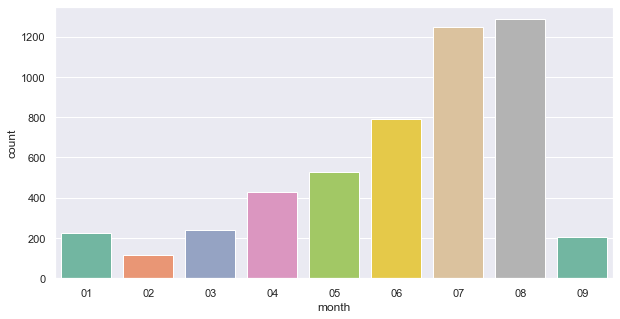

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

# 그래프를 출력합니다.
plt.figure(figsize=(10,5))

sns.set(style="darkgrid")
ax = sns.countplot(x="month",data= covid_delete_col[covid_delete_col['지역'] == '강남구'] , palette="Set2", order = xorder)


### 3.7. 서울 지역에서 확진자를 지도에 출력

지도를 출력하기 위한 라이브러리로 folium을 사용해 봅시다.

In [25]:
# 지도 출력을 위한 라이브러리 folium을 import 합니다.
import folium

# Map 함수를 사용하여 지도를 출력합니다.
map_osm = folium.Map(location=[37.529622, 126.984307], zoom_start=11)

map_osm

지역마다 지도에 정보를 출력하기 위해서는 각 지역의 좌표정보가 필요합니다.

이를 해결하기 위해서 서울시 행정구역 시군 정보 데이터를 불러와 사용합니다.

데이터 출처: https://data.seoul.go.kr/dataList/OA-11677/S/1/datasetView.do

In [26]:
# CRS에 저장합니다.
CRS=pd.read_csv("./data/서울시 행정구역 시군구 정보 (좌표계_ WGS1984).csv")

In [27]:
# Dataframe을 출력해 봅니다.
CRS

,순번,시군구코드,시군구명_한글,시군구명_영문,ESRI_PK,위도,경도
0,1,11320,도봉구,Dobong-gu,0,37.665861,127.031767
1,2,11380,은평구,Eunpyeong-gu,1,37.617612,126.922700
2,3,11230,동대문구,Dongdaemun-gu,2,37.583801,127.050700
3,4,11590,동작구,Dongjak-gu,3,37.496504,126.944307
4,5,11545,금천구,Geumcheon-gu,4,37.460097,126.900155
5,6,11530,구로구,Guro-gu,5,37.495486,126.858121
6,7,11110,종로구,Jongno-gu,6,37.599100,126.986149
7,8,11305,강북구,Gangbuk-gu,7,37.646995,127.014716
8,9,11260,중랑구,Jungnang-gu,8,37.595379,127.093967
9,10,11680,강남구,Gangnam-gu,9,37.495985,127.066409


이제 for 문을 사용하여 지역마다 확진자를 원형 마커를 사용하여 지도에 출력해 봅시다.

In [32]:
# df_corona의 지역에는 'oo구' 이외로 `타시도`, `기타`에 해당되는 데이터가 존재 합니다.
# 위 데이터에 해당되는 위도, 경도를 찾을 수 없기에 삭제하여 corona_seoul로 저장합니다.
corona_seoul = covid_delete_col.drop(covid_delete_col[covid_delete_col['지역'] == '타시도'].index)
corona_seoul = corona_seoul.drop(covid_delete_col[covid_delete_col['지역'] == '기타'].index)

# 서울 가운데 좌표를 잡아 지도를 출력합니다.
map_osm = folium.Map(location=[37.529622, 126.984307],
                     zoom_start=12)

# 지역 정보를 set 함수를 사용하여 25개 고유의 지역을 뽑아냅니다.
for region in set(corona_seoul['지역']):

    # 해당 지역의 데이터 개수를 count에 저장합니다.
    count = len(corona_seoul[corona_seoul['지역'] == region])
    # 해당 지역의 데이터를 CRS에서 뽑아냅니다.
    CRS_region = CRS[CRS['시군구명_한글'] == region]
    lat = float(CRS_region['위도'])
    lng = float(CRS_region['경도'])

    # CircleMarker를 사용하여 지역마다 원형마커를 생성합니다.
    folium.CircleMarker(location=[lat, lng], # 위치
                        radius=count/5 + 10,
                        fill=True,
                        fill_color='#3186cc').add_to(map_osm)
    
map_osm

TypeError: cannot convert the series to <class 'float'>